### Run this to get the data now

In [1]:
#Click here and press Shift+Enter
download.file("https://ibm.box.com/shared/static/5wah9atr5o1akuuavl2z9tkjzdinr1lv.csv",
              destfile = "/resources/data/recipes.csv", quiet = TRUE)

## Install libraries if not installed
if("rpart" %in% rownames(installed.packages()) == FALSE) {install.packages("rpart", 
    repo = "http://mirror.las.iastate.edu/CRAN/")}
if("rpart.plot" %in% rownames(installed.packages()) == FALSE) {install.packages("rpart.plot", 
    repo = "http://mirror.las.iastate.edu/CRAN/")}

print("Done") #Takes about 30 seconds

[1] "Done"


<hr>

<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 400> </a>


<h1 align=center> Data Science Methodology</h1>
<h1 align=center> With Decision Trees and Clustering</h1>
<h4 align=center><a href = "https://ca.linkedin.com/in/polonglin">Polong Lin</a></h4>


### Table of contents:

1. Import `recipes.csv` into R.
2. Model data using decision trees
    - import the required libraries
    - display the decision tree
    - summarize the decision tree
    - create refined decision trees
3. Testing our model(s)
4. Predict the cuisine of your own recipe, "`my_recipe`"

<hr>

### Using this notebook:

**Shift + Enter** to run a cell:

In [2]:
# Check R version
R.Version()$version.string

[1] "R version 3.3.1 (2016-06-21)"

<hr>

## 1. Import recipes.csv into R.

Run the cell below by clicking on it and pressing Shift + Enter

In [3]:
recipes <- read.csv("/resources/data/recipes.csv") #takes 10 sec

<hr>

<img src = https://ibm.box.com/shared/static/jrv1mg8v3e7gm58go1ccn4u78pxhmb1l.png width = 600>

## Cleaning the data:

In [40]:
#Run this

#Convert country names to lower case
recipes$country <- tolower( as.character(recipes$country) ) 

#Make the country names consistent
recipes$country[recipes$country == "china"] <- "chinese"
recipes$country[recipes$country == "france"] <- "french"
recipes$country[recipes$country == "germany"] <- "german"
recipes$country[recipes$country == "india"] <- "indian"
recipes$country[recipes$country == "israel"] <- "jewish"
recipes$country[recipes$country == "italy"] <- "italian"
recipes$country[recipes$country == "japan"] <- "japanese"
recipes$country[recipes$country == "korea"] <- "korean"
recipes$country[recipes$country == "mexico"] <- "mexican"
recipes$country[recipes$country == "scandinavia"] <- "scandinavian"
recipes$country[recipes$country == "thailand"] <- "thai"
recipes$country[recipes$country == "vietnam"] <- "vietnamese"

#Remove data for countries with <50 recipes:
t <- sort(base::table(recipes$country), decreasing = T)
filter_list <- names( t[ t >= 50 ] )
recipes <- recipes[recipes$country %in% filter_list, ]
recipes$country <- as.factor(as.character(recipes$country))
sort(base::table(recipes$country), decreasing = T)

#Convert all of the columns into factors (to run the classification model later)
recipes[,names(recipes)] <- lapply(recipes[,names(recipes)] , as.factor)


               american                 italian                 mexican 
                  40150                    3250                    2390 
                 french                   asian              east_asian 
                   1264                    1193                     951 
                 korean                  canada                  indian 
                    799                     774                     598 
                western                 chinese       southern_soulfood 
                    450                     442                     346 
                 jewish                japanese      spanish_portuguese 
                    329                     320                     291 
                 german           mediterranean                    thai 
                    289                     289                     289 
         uk-and-ireland            scandinavian           middleeastern 
                    282                     250   

<hr>

## 3. Model data using decision trees for prediction

**Overall goal:**
- to create a decision tree model that predicts the type of cuisine based on the ingredients

<br>
**Goals:**
- install & import libraries relevant to decision trees
- attempt to create a decision tree on all the recipes

Install libraries (for decision trees):

In [41]:
# Run this

## Install libraries if not installed
if("rpart" %in% rownames(installed.packages()) == FALSE) {install.packages("rpart", 
    repo = "http://mirror.las.iastate.edu/CRAN/")}
if("rpart.plot" %in% rownames(installed.packages()) == FALSE) {install.packages("rpart.plot", 
    repo = "http://mirror.las.iastate.edu/CRAN/")}


## Load libraries
library(rpart)
library(rpart.plot)

Check the data again!

In [42]:
head(recipes)

     country almond angelica anise anise_seed apple apple_brandy apricot
1 vietnamese     No       No    No         No    No           No      No
2 vietnamese     No       No    No         No    No           No      No
3 vietnamese     No       No    No         No    No           No      No
4 vietnamese     No       No    No         No    No           No      No
5 vietnamese     No       No    No         No    No           No      No
6 vietnamese     No       No    No         No    No           No      No
  armagnac artemisia artichoke asparagus avocado bacon baked_potato balm banana
1       No        No        No        No      No    No           No   No     No
2       No        No        No        No      No    No           No   No     No
3       No        No        No        No      No    No           No   No     No
4       No        No        No        No      No    No           No   No     No
5       No        No        No        No      No    No           No   No     No
6       N

<br> 
## [bamboo_tree] Only East Asian countries (+ India)

Here, we are creating a decision tree for the recipes for just some of the East Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason for this is because the decision tree does not run well when the data is biased towards one output (American cuisines). To rectify this, we can just take a subset of the dataframe to build the decision tree.

**Problem:**
- "recipes_mid" decision tree not specific enough

**Goals:**
- create a decision tree for just East Asian countries (Korean, Japanese, Chinese, Thai)
- add Indian cuisine for comparison

Run the cell below to create a decision tree, assigned to `bamboo_tree`:

In [43]:
### ASSIGN THE MODEL TO "bamboo_tree" ###

## Select subset of countries
bamboo_tree <- rpart(formula = country ~ ., 
                     data = recipes[recipes$country %in% c("korean", 
                                                           "japanese", 
                                                           "chinese", 
                                                           "thai",
                                                           "indian"),], 
                     method ="class")

#Decision tree model saved to bamboo_tree

For more information on the `rpart` function, you can precede the function with a question mark to get more info:

In [44]:
?rpart

Plot the decision tree, `bamboo_tree`:

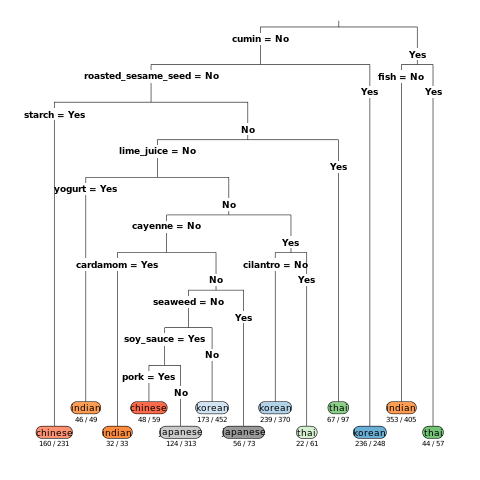

In [45]:
# Run this

## Plot the East Asian + Indian model
## run "?rpart.plot" if you want to see the arguments for rpart.plot
rpart.plot(bamboo_tree, type = 3, extra = 2, under = TRUE, cex = 0.75, varlen = 0, faclen = 0)

Print the summary for `bamboo_tree`

In [46]:
## Summary of Asian tree
summary(bamboo_tree)

Call:
rpart(formula = country ~ ., data = recipes[recipes$country %in% 
    c("korean", "japanese", "chinese", "thai", "indian"), ], 
    method = "class")
  n= 2448 

          CP nsplit rel error    xerror       xstd
1 0.21710127      0 1.0000000 1.0000000 0.01406881
2 0.03608247      1 0.7828987 0.7828987 0.01497971
3 0.02789569      4 0.6701031 0.6749545 0.01494039
4 0.02183141      5 0.6422074 0.6652517 0.01492123
5 0.01855670      6 0.6203760 0.6070346 0.01475112
6 0.01334142     11 0.5275925 0.5500303 0.01449034
7 0.01000000     12 0.5142511 0.5294118 0.01437213

Variable importance
              cumin           coriander            turmeric           fenugreek 
                 19                  12                  12                   9 
roasted_sesame_seed              starch              pepper                fish 
                  8                   5                   4                   4 
         lime_juice              yogurt             cayenne             coconut

<br> 
## [olive_tree] Only European countries

**Goals:**
- create a decision tree for just European countries

**YOUR TURN**

Fit a decision tree model using the specified countries and assign it to `olive_tree`:

In [47]:
unique(recipes$country)

 [1] vietnamese              indian                  spanish_portuguese     
 [4] jewish                  french                  central_southamerican  
 [7] cajun_creole            thai                    scandinavian           
[10] greek                   american                african                
[13] middleeastern           easterneuropean_russian italian                
[16] irish                   mexican                 chinese                
[19] german                  mediterranean           japanese               
[22] moroccan                southern_soulfood       english_scottish       
[25] asian                   southwestern            east_asian             
[28] western                 korean                  canada                 
[31] caribbean               eastern-europe          uk-and-ireland         
[34] south-america           spain                   north-african          
[37] portugal               
37 Levels: african american asian cajun_creole 

In [48]:
### ASSIGN THE MODEL TO "olive_tree" ###

## Select subset of countries
olive_tree <- rpart(formula = country ~ ., 
                     data = recipes[recipes$country %in% c("italian", 
                                                           "french", 
                                                           "german", 
                                                           "spanish_portuguese",
                                                           "mediterranean",
                                                           "scandinavian",
                                                           "greek"),],
                     method ="class")


Plot the decision tree, `olive_tree`:

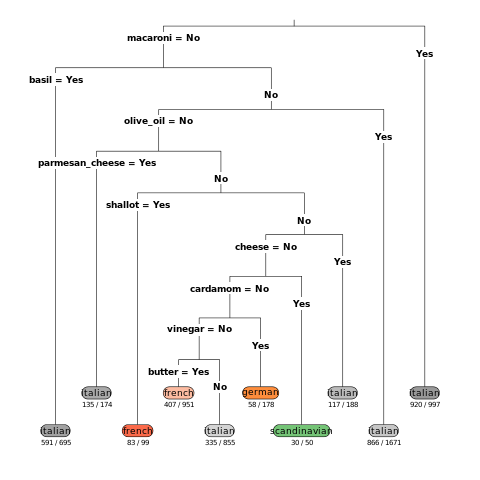

In [49]:
# Run this

## Plot the European model
rpart.plot(olive_tree, type = 3, extra = 2, under = TRUE, cex = 0.75, varlen = 0, faclen = 0)

Print the summary for `olive_tree`

In [50]:
## Summary of European tree
summary(olive_tree)

Call:
rpart(formula = country ~ ., data = recipes[recipes$country %in% 
    c("italian", "french", "german", "spanish_portuguese", "mediterranean", 
        "scandinavian", "greek"), ], method = "class")
  n= 5858 

          CP nsplit rel error    xerror       xstd
1 0.01169479      0 1.0000000 1.0000000 0.01458523
2 0.01000000      9 0.8880368 0.9428681 0.01448347

Variable importance
         macaroni             basil         olive_oil   parmesan_cheese 
               29                19                14                 6 
           garlic            butter           shallot            cheese 
                5                 4                 4                 3 
           tomato          cardamom           vinegar               egg 
                3                 2                 2                 2 
      bell_pepper mozzarella_cheese             wheat 
                2                 1                 1 

Node number 1: 5858 observations,    complexity param=0.01169

<br>
<hr>
# 4. Evaluating our model(s)

**Goals:**
- split data into training and testing dataset
- train the model on the training dataset
- use the testing dataset (without country labels) to see how the model classifies the unlabeled recipes

**Let's limit our dataset to East Asian cuisines (+ Indian).**

Assign the new dataframe to `bamboo`:

In [51]:
### ASSIGN THE SUBSETTED DATAFRAME TO "bamboo" ###

## Reduce the recipes dataset into East Asian + Indian only
bamboo <- recipes[recipes$country %in% c("korean", "japanese", "chinese",
                                              "thai", "indian"),]

#### How many recipes are there for each cuisine?

In [52]:
table(as.factor(as.character(bamboo$country)))


 chinese   indian japanese   korean     thai 
     442      598      320      799      289 

#### Let's remove 30 recipes from each cuisine to use as the test dataset, "bamboo_test"

Set the sample size, `sample_n`, to 30:

In [53]:
# Run this

## Set sample size
sample_n <- 30

Create a dataframe containing 30 recipes from each cuisine, selected randomly:

In [54]:
#Run this

## Take n recipes from each country
set.seed(4) #Set random seed
korean <- bamboo[sample(which(bamboo$country == "korean") , sample_n), ]
japanese <- bamboo[sample(which(bamboo$country == "japanese") , sample_n), ]
chinese <- bamboo[sample(which(bamboo$country == "chinese") , sample_n), ]
thai <- bamboo[sample(which(bamboo$country == "thai") , sample_n), ]
indian <- bamboo[sample(which(bamboo$country == "indian") , sample_n), ]

#Create the dataframe
bamboo_test <- rbind(korean,japanese, chinese, thai, indian)

Check that there are 30 recipes for each cuisine:

In [55]:
# Run this

## Check that we have 30 recipes from each cuisine
table(as.factor(as.character(bamboo_test$country)))


 chinese   indian japanese   korean     thai 
      30       30       30       30       30 

#### Next, let's create the training set by removing the test set from the original dataset (`bamboo`)

In [56]:
# Run this

## Create the training dataset (remove test set from original bamboo dataset)
bamboo_train <- bamboo[!(rownames(bamboo) %in% rownames(bamboo_test)),]

Check that there are 30 _fewer_ recipes now for each cuisine:

In [57]:
# Run this

## Check that we have subtracted 30 recipes from each cuisine
table(as.factor(as.character(bamboo_train$country)))


 chinese   indian japanese   korean     thai 
     412      568      290      769      259 


### Train a decision tree model (`bamboo_tree_pred`) on `bamboo_train`

In [58]:
#Run this

#Train on the bamboo_train data
bamboo_tree_pred <- rpart(formula = country ~ ., 
                     data = bamboo_train[bamboo_train$country %in% c("korean", 
                                                           "japanese", 
                                                           "chinese", 
                                                           "thai",
                                                           "indian"),], 
                     method ="class")

#### Plot the decision tree based on bamboo_train:

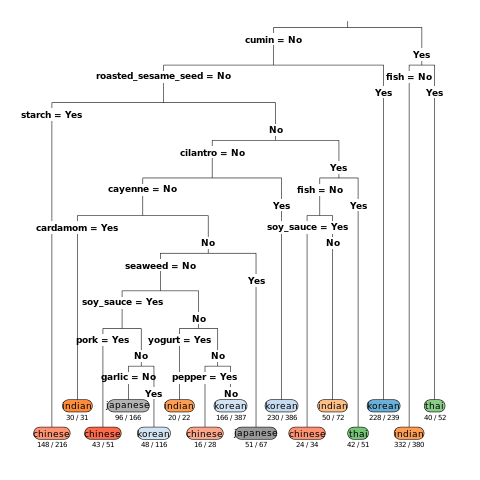

In [59]:
#Run this

#Plot the trained tree
rpart.plot(bamboo_tree_pred, type = 3, extra = 2, under = TRUE, 
           cex = 0.75, varlen = 0, faclen = 0)

(Small changes in the dataset can cause major changes in the decision tree.)

#### Use `bamboo_tree_pred` to predict the cuisines on `bamboo_test`:

In [60]:
#Run this

bamboo_fit <- predict(bamboo_tree_pred, subset(bamboo_test, select=-c(country)), type = "class")

#### Create a confusion matrix:
- compare the predictions (from the model) with the actual cuisine labels (from the recipes)

In [61]:
#Run this

bamboo_tab <- table(paste(as.character(bamboo_fit),"_pred", sep =""), 
                    paste(as.character(bamboo_test$country),"_true", sep =""))
bamboo_tab

               
                chinese_true indian_true japanese_true korean_true thai_true
  chinese_pred            18           0             6           2         1
  indian_pred              0          27             1           0         6
  japanese_pred            1           0            10           5         0
  korean_pred             11           3            12          23        10
  thai_pred                0           0             1           0        13

#### Convert table to percentages (proportion table)
- sum to 100% _COLUMN_-wise

In [62]:
#Run this

round(prop.table(bamboo_tab,2)*100,1)

               
                chinese_true indian_true japanese_true korean_true thai_true
  chinese_pred          60.0         0.0          20.0         6.7       3.3
  indian_pred            0.0        90.0           3.3         0.0      20.0
  japanese_pred          3.3         0.0          33.3        16.7       0.0
  korean_pred           36.7        10.0          40.0        76.7      33.3
  thai_pred              0.0         0.0           3.3         0.0      43.3

#### Intrepreting the table:
- each column is the actual recipe's label (from the website)
- each value represents the percentage of country X's recipes correctly labeled as country X
- _Example: 60.3% of the Chinese recipes were correctly predicted as "Chinese", 
incorrectly predicted 36.7% of the time as "Korean", and incorrectly predicted 3.3% of the time as "Japanese"_

#### Discussion:
- Which cuisines were likely to be mis-classified or correctly classified?
- Which cuisines seem to be mistaken for which other cuisines?

<br>
<hr>
## 5. Predict the cuisine of your own recipe, "`my_recipe`"

Initialize some things...

In [63]:
#Creates an empty recipe, "my_recipe"
my_recipe <- recipes[1,]
my_recipe[my_recipe[1,]== "Yes"] <- "No"
my_recipe$country <- NULL



In [64]:
#Function to find an ingredient 
ing_find <- function(ing){
    if(length(grep(tolower(ing),names(recipes), value = TRUE)) > 0){
        grep(tolower(ing),names(recipes), value = TRUE)
        }
    else{paste(ing,"was not found.")}
    }

#Function to predict using the bamboo_tree_pred model, by default
recipe_predict <- function(inputrecipe, model = bamboo_tree_pred){
    p <- as.character(predict(model, inputrecipe, type = "class"))
    paste("Hmm... your recipe tastes rather...", toupper(p))
}

### Check your ingredient names:
First, check that your ingredient exists in the list of ingredients:

In [65]:
# Example: 
ing_find("wasabi")
ing_find("tea")

### YOUR CODE BELOW ###


[1] "wasabi"

[1] "black_tea"   "green_tea"   "jasmine_tea" "tea"        

### Add the ingredient to my_recipe:
Add each ingredient by change their value to "Yes":

In [66]:
#Creates an empty recipe, "my_recipe"
my_recipe <- recipes[1,]
my_recipe[my_recipe[1,]== "Yes"] <- "No"
my_recipe$country <- NULL

### YOUR CODE BELOW ###
my_recipe$rice <- "Yes"
my_recipe$wasabi <- "Yes"
my_recipe$soy_sauce <- "Yes"

### Predict which cuisine "`my_recipe`" belongs to:

Run the code as is:

In [67]:
# Run this:

recipe_predict(my_recipe, model = bamboo_tree) #or olive_tree

[1] "Hmm... your recipe tastes rather... JAPANESE"

<br>
<hr>

<hr>
**References**  
Recipes dataset adapted from: 
- [Ahn, Yong-Yeol, et al. "Flavor network and the principles of food pairing." Scientific reports 1 (2011).](http://yongyeol.com/papers/ahn-flavornet-2011.pdf)
- ^ Dataset on ingredient-compounds also available